In [1]:
import keras
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from keras.datasets import cifar10
from keras import optimizers
from matplotlib import pyplot as plt

In [2]:
# generate cifar10 data
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
# config parameters
num_classes = 10
input_shape = x_train.shape[1:4]
optimizer = optimizers.Adam(lr=0.0003)

In [4]:
# convert label to one-hot
one_hot_y_train = keras.utils.to_categorical(y_train,num_classes=num_classes)
one_hot_y_test = keras.utils.to_categorical(y_test,num_classes=num_classes)

(32, 32, 3)


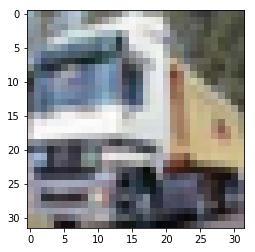

In [5]:
# check data
plt.imshow(x_train[1])
print(x_train[1].shape)

In [6]:
# build model(similar to VGG16, only change the input and output shape)
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape,padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [7]:
# config optimizer,loss,metrics
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
# check model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 256)         295168    
__________

In [9]:
# train
model.fit(x=x_train,y=one_hot_y_train,batch_size=128,epochs=10)

Epoch 1/10
50000/50000 [==============================] - 55s 1ms/step - loss: 2.0531 - acc: 0.1664
Epoch 2/10
50000/50000 [==============================] - 48s 960us/step - loss: 1.6252 - acc: 0.3428
Epoch 3/10
50000/50000 [==============================] - 48s 962us/step - loss: 1.2261 - acc: 0.5474
Epoch 4/10
50000/50000 [==============================] - 48s 961us/step - loss: 0.9366 - acc: 0.6680
Epoch 5/10
50000/50000 [==============================] - 48s 962us/step - loss: 0.7420 - acc: 0.7407
Epoch 6/10
50000/50000 [==============================] - 48s 963us/step - loss: 0.5994 - acc: 0.7932
Epoch 7/10
50000/50000 [==============================] - 48s 965us/step - loss: 0.4789 - acc: 0.8359
Epoch 8/10
50000/50000 [==============================] - 48s 965us/step - loss: 0.3797 - acc: 0.8699
Epoch 9/10
50000/50000 [==============================] - 48s 966us/step - loss: 0.2999 - acc: 0.8966
Epoch 10/10
50000/50000 [==============================] - 48s 965us/step - loss: 0.

In [10]:
# evaluate
print(model.metrics_names)
model.evaluate(x=x_test,y=one_hot_y_test,batch_size=512)

['loss', 'acc']
10000/10000 [==============================] - 4s 423us/step


[0.8667356510162354, 0.7654999996185303]

predict class: 5
expected class: 5


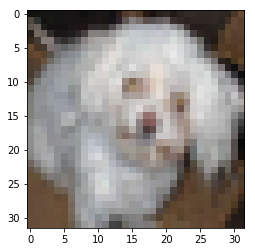

In [11]:
# predict
plt.imshow(x_test[1000])

result = model.predict(x_test[1000:1001]).tolist()
predict = 0
expect = y_test[1000][0]
for i,_ in enumerate(result[0]):
    if result[0][i] > result[0][predict]:
        predict = i
print("predict class:",predict)
print("expected class:",expect)

In [12]:
# save model
model.save("keras-VGG16-cifar10.h5")

In [13]:
# if you want to skip training, just load the model
'''
from keras.models import load_model
from matplotlib import pyplot as plt

model = load_model("keras-VGG16-cifar10.h5")
model.summary()
plt.imshow(x_test[1000])
result = model.predict(x_test[1000:1001]).tolist()
predict = 0
expect = y_test[1000][0]
for i,_ in enumerate(result[0]):
    if result[0][i] > result[0][predict]:
        predict = i
print("predict class:",predict)
print("expected class:",expect)
'''

'\nfrom keras.models import load_model\nfrom matplotlib import pyplot as plt\n\nmodel = load_model("keras-VGG16-cifar10.h5")\nmodel.summary()\nplt.imshow(x_test[1000])\nresult = model.predict(x_test[1000:1001]).tolist()\npredict = 0\nexpect = y_test[1000][0]\nfor i,_ in enumerate(result[0]):\n    if result[0][i] > result[0][predict]:\n        predict = i\nprint("predict class:",predict)\nprint("expected class:",expect)\n'